In [2]:
import cellrank as cr
import scanpy as sc
# import stereo as st
import scvelo as scv
import matplotlib.pyplot as plt
import colorcet as cc
import matplotlib

In [3]:
adata_all = sc.read_h5ad('../../../02.bigAtlas/data/22.Merge_update/01.ST/ZH11_ST_main.h5ad')

In [8]:
adata = adata_all[(adata_all.obs['celltype_L2'].isin([
    'Starchy_endosperm_1', 'Starchy_endosperm_2',
    'Endosperm_adjacent_to_scutellum'
])) & (adata_all.obs['stage']=='DAP08')]

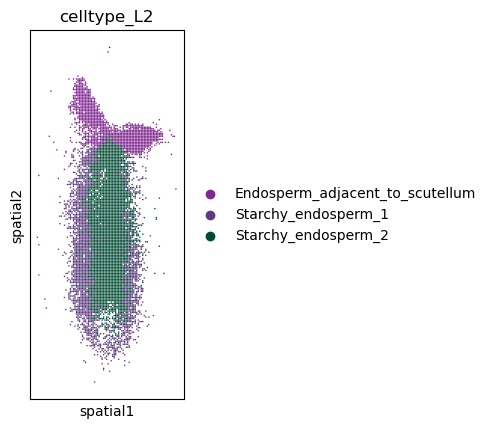

In [9]:
sc.pl.spatial(adata, spot_size=30, color='celltype_L2')

In [10]:
sc.pp.filter_genes(adata, min_cells=1)

/share/home/bgi_qinmm/.conda/envs/py310/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [11]:
# filter, normalize total counts and log-transform
sc.pp.filter_genes(adata, min_cells=10)
scv.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

# hvg annotation
sc.pp.highly_variable_genes(adata)

Normalized count data: X.


In [12]:
adata.layers["spliced"] = adata.X
adata.layers["unspliced"] = adata.X
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

/tmp/ipykernel_53792/3936592386.py:3: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/share/home/bgi_qinmm/.conda/envs/py310/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/share/home/bgi_qinmm/.conda/envs/py310/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  _set_pca(adata=adata, n_pcs=n_pcs, use_highly_variable=use_highly_variable)


computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:11) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [13]:
from cellrank.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(adata).compute_cytotrace()

In [14]:
ctk.compute_transition_matrix(threshold_scheme="soft", nu=0.5)

  0%|          | 0/6231 [00:00<?, ?cell/s]

CytoTRACEKernel[n=6231, dnorm=False, scheme='soft', b=10.0, nu=0.5]

In [15]:
import pandas as pd
ct2color_dict = pd.read_csv('../../../02.bigAtlas/15.celltype_merge/celltype_color_spaco.xls', sep='\t').set_index('celltype_L2').to_dict()['color_use']

/share/home/bgi_qinmm/.conda/envs/py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/share/home/bgi_qinmm/.conda/envs/py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:65: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return cat(data)  # if data is categorical/array
/share/home/bgi_qinmm/.conda/envs/py310/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


saving figure to file ./cellrank_cytotrace_DAP08_datucolor.svg


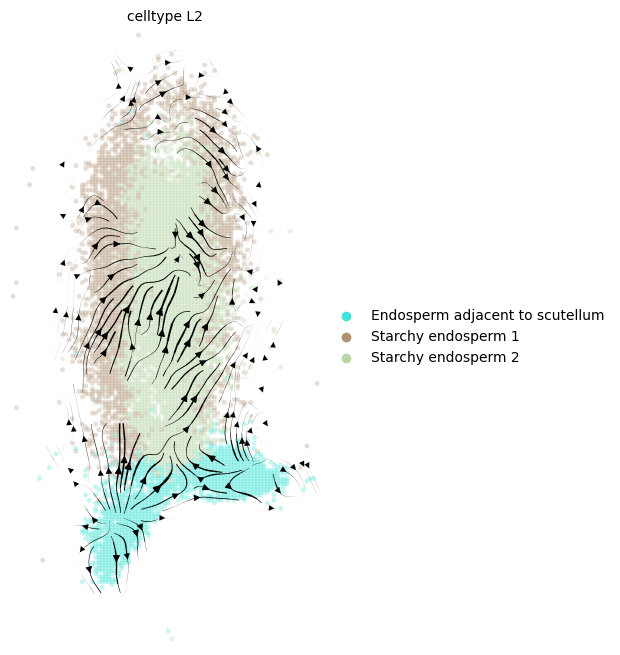

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(4, 8,))
ctk.plot_projection(
    basis="spatial", 
    color="celltype_L2", 
    legend_loc="right", 
    ax=axs, 
    palette=ct2color_dict,
    size=50,
    save='./cellrank_cytotrace_DAP08_datucolor.svg'
    # show=False
)
# fig = matplotlib.pyplot.gcf()
# fig.show()
# print(p)
# plt.savefig('./cellrank_cytotrace_DAP08.pdf')

In [17]:
# ! convert -density 300 ./cellrank_cytotrace_DAP08_datucolor.svg cellrank_cytotrace_DAP08_datucolor.pdf

In [19]:
# print(axs)
import pickle
# 假设 cytotrace_obj 是你要保存的 Cytotrace 对象
with open('cellrank_cytotrace_DAP08.pkl', 'wb') as f:  # 'wb' 表示二进制写入
    pickle.dump(ctk, f)

In [20]:
# import pickle
# with open('cellrank_cytotrace_DAP08.pkl', 'rb') as f:  # 'wb' 表示二进制写入
#     ctk = pickle.load(f)